# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,StandardScaler
from sklearn.cluster import KMeans

## Load the Data

In [102]:
df=pd.read_csv("/content/Traffic_Accidents.csv")

In [103]:
df.sample(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
12495,533100.0,179100.0,-0.084034,51.495128,1,3.0,2,1.0,10/04/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2009
9338,538980.0,180960.0,0.001347,51.510428,1,3.0,2,1.0,23/06/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
25504,366340.0,428450.0,-2.511948,53.751320,4,3.0,2,1.0,15/10/2014,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2014
42187,348020.0,118910.0,-2.741645,50.967192,52,3.0,2,1.0,16/11/2009,2,...,3,303,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2009
42730,548960.0,210720.0,0.157718,51.775283,42,3.0,1,1.0,14/08/2007,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,2.0,Yes,2007
34604,654130.0,292940.0,1.740744,52.475133,37,3.0,2,2.0,12/10/2005,4,...,6,6089,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2005
27215,355453.0,404539.0,-2.673608,53.535595,6,3.0,2,1.0,18/09/2011,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,2011
50393,263210.0,51860.0,-3.924132,50.350651,50,3.0,2,1.0,21/04/2009,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2009
50632,368150.0,426260.0,-2.484273,53.731750,4,2.0,2,2.0,24/09/2012,2,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2012
31205,520360.0,178510.0,-0.267666,51.492679,1,2.0,1,1.0,20/08/2010,6,...,-1,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2010


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [106]:
df.shape

(52000, 26)

In [107]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [108]:
df.duplicated().sum()

43

In [109]:
df=df.drop_duplicates()

In [110]:
df['Urban_or_Rural_Area'].value_counts()

,count
Urban_or_Rural_Area,
1.0,33222
2.0,18646
3.0,1


In [111]:
df['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight: Street light present,37711
Darkness: Street lights present and lit,10111
Darkeness: No street lighting,2811
Darkness: Street lighting unknown,535
Darkness: Street lights present but unlit,245


In [112]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1.0,39004
2.0,8189
3.0,2367
4.0,842
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [113]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3.0,43890
2.0,7080
1.0,665


In [114]:
from sklearn.impute import SimpleImputer
imputet=SimpleImputer(strategy='most_frequent')
imputet.fit(df[['Number_of_Casualties','Light_Conditions','Urban_or_Rural_Area','Accident_Severity']])

SimpleImputer(strategy='most_frequent')

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [115]:
#Implement One-Hot Encoding for nominal categorical variables.
oen=OneHotEncoder()
df=oen.fit_transform(df[['Road_Type','Road_Surface_Conditions']])

In [116]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled=scaler.fit_transform(df[['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Speed_limit','Urban_or_Rural_Area','Accident_Severity']])

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U22'), dtype('<U22')) -> None

In [117]:
sns.boxplot(df)
plt.xticks(rotation=90)

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [118]:
def romove_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1 - 1.5 *IQR
  upper_bound=Q3 + 1.5 *IQR
  return df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

df=romove_outliers(df,'Location_Northing_OSGR')

IndexError: Index dimension must be 1 or 2

In [119]:
sns.boxplot(df)
plt.xticks(rotation=90)

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [126]:
from sklearn.decomposition import PCA
n_component=2
pca=PCA(n_component)
X_pca=pca.fit_transform(X_scaled)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.show()

NameError: name 'X_scaled' is not defined

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: >

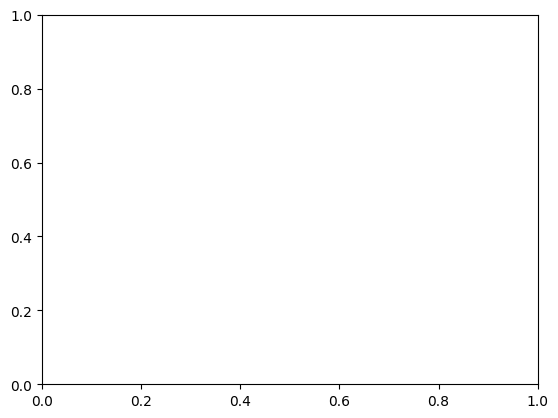

In [121]:
sns.scatterplot()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [122]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X_pca)


NameError: name 'X_pca' is not defined

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [123]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, y_pred)
silhouette

NameError: name 'X_pca' is not defined

## Plot the data points with their predicted cluster center

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
plt.show()

NameError: name 'X_pca' is not defined

<Figure size 800x600 with 0 Axes>

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

**Justify Your Feature Selection**
-the feature that i have select is **Longitude,Latitude,Road_Type,Speed_limit,Urban_or_Rural_Area,Accident_Severity,Location_Easting_OSGR ,Location_Northing_OSGR **because the we are analyzing the accidents based on their geographical location.and it could be clusters upon the location.

**Number of Clusters Choices**
upn the Elbow method it's useful for determinig the number of clusters .

**Evaluation**
for evaluation i've used the shliton for clustring.

**Improvements and Recommendations**

